In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
genres = df[['movie_title','genres']]

# Посмотрим на способы применения какой либо функции к данным

#### Первый способ это обычная итерация. Датафрейм это коллекция по которой питон может итерироваться

In [7]:
# Итерация происходит по названиям колонок
for i in genres:
    print(i)

movie_title
genres


In [8]:
# Тоже самое
for i in genres.columns:
    print(i)

movie_title
genres


In [ ]:
# Чтобы итерироваться по значениям нужно вызвать атрибут
for i in genres.values:
    print(i)

In [21]:
def reversor(value):
    return value[::-1]

In [ ]:
# Теперь можно применить функцию например переворачивания
for i in genres.values:
    for j in i:
        print(reversor(j))

In [ ]:
# Можно итерироваться через iterrow. Это по строкам
# Это кортеж состоящий из индекса строки и пандасовской серии
for i in genres.iterrows():
    print(i)

In [ ]:
# Можно избавиться от индекса распаковав его
for i,row in genres.iterrows():
    print(row)

In [ ]:
# По столбцам. Сначала по одному столбцу затем по другому.
for i,row in genres.iteritems():
    print(row)

In [ ]:
# Можем применять к series map
for i,row in genres.iterrows():
    print(row.map(reversor))

#### Нормальный вариант apply 

In [32]:
budget = df[['budget','duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [33]:
# Применяется ко всем значениям в датафрейме
budget.applymap(lambda x: x + 1)


,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [35]:
# Может применятся к отдельной колонке
budget.apply(np.mean, axis=0)


budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [39]:
# Почти тоже самое кроме того что не может принимать агрегирующие функции.
%timeit budget.transform(lambda x: x + 1)


1.78 ms ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
# Если нужна скорость то можно работать с нумпаевским массивом чтобы добраться до него 
df['budget'].values

array([2.37e+08, 3.00e+08, 2.45e+08, ..., 1.40e+03,      nan, 1.10e+03])

### 3.7.6
Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.

 

Пример датасэта для тестирования

При использовании jupyter notebook можно оттестировать скорость выполнения кода при помощи "магии" timeit, которая проведёт несколько прогонов кода и выдаст среднее значение

%%timeit
your_command
Если вы пользуетесь чем-то другим, воспользуйтесь библиотекой time

from time import time
before = time()
your_command
after = time()
print(after - before)


In [42]:
df = pd.read_csv('../data/iris_1.csv')

In [ ]:
# Используем магию %timeit для подсчета времени выполнения каждой функции


In [43]:
%timeit df.describe().loc['mean']

16.8 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
%timeit df.mean(axis=0)

334 µs ± 6.56 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
%timeit df.apply('mean')

407 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
%timeit df.apply(np.mean)

1.75 ms ± 28.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Временные ряды

In [48]:
df = pd.read_csv('../data/AMZN.csv')

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-16,1851.349976,1869.770020,1848.000000,1863.040039,1863.040039,3044600
1,2019-04-17,1872.989990,1876.469971,1860.439941,1864.819946,1864.819946,2893500
2,2019-04-18,1868.790039,1870.819946,1859.479980,1861.689941,1861.689941,2749900
3,2019-04-22,1855.400024,1888.420044,1845.640015,1887.310059,1887.310059,3373800
4,2019-04-23,1891.199951,1929.260010,1889.579956,1923.770020,1923.770020,4640400


In [50]:
df.shape

(252, 7)

Но это не настоящий временной ряд(TimeSeries). Чтобы сделать его таким, необходимо чтобы временной ряд стал индексом а также правильно сконвертировать дату. Для этого при считывании датафрейма, необходимо добавить несколько параметров

In [3]:
df = pd.read_csv('../data/AMZN.csv',index_col='Date',parse_dates=True)

In [4]:
# Теперь дата является индексом.
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-16,1851.349976,1869.77002,1848.0,1863.040039,1863.040039,3044600


In [5]:
# Посмотрим на индекс
df.index
# Видим что у индекса особоый тип DatetimeIndex

DatetimeIndex(['2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30',
               ...
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13',
               '2020-04-14', '2020-04-15'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [10]:
# Это дает нам ряд преимуществ.
# Например мы можем работать с частью индекса и таким образом отбирать записи за какой то год
df['2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000
...,...,...,...,...,...,...
2020-04-08,2021.000000,2044.000000,2011.150024,2043.000000,2043.000000,3977300
2020-04-09,2044.300049,2053.000000,2017.660034,2042.760010,2042.760010,4655600
2020-04-13,2040.000000,2180.000000,2038.000000,2168.870117,2168.870117,6716700


In [13]:
# Можно получать диапазоны данных
df['2019-11':'2020-02']


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,1788.010010,1797.449951,1785.209961,1791.439941,1791.439941,2790400
2019-11-04,1801.010010,1815.060059,1801.010010,1804.660034,1804.660034,2771900
2019-11-05,1809.160034,1810.250000,1794.000000,1801.709961,1801.709961,1885500
2019-11-06,1801.000000,1802.500000,1788.579956,1795.770020,1795.770020,2029800
2019-11-07,1803.760010,1805.900024,1783.479980,1788.199951,1788.199951,2651100
...,...,...,...,...,...,...
2020-02-24,2003.180054,2039.300049,1987.969971,2009.290039,2009.290039,6547000
2020-02-25,2026.420044,2034.599976,1958.420044,1972.739990,1972.739990,6219100
2020-02-26,1970.280029,2014.670044,1960.449951,1979.589966,1979.589966,5224600


### Мы можем группировать временные ряды по каким то промежуткам с помощью
__resample__

In [14]:
# Можем поделить сутки на промежутки по 2 часа. Так как данных нет, то значения новых промежутков
# будет заполнено NAN
# Так как она работает как groupby, то необходимо применить какую нибудь агрегирующую функцию
# можно применить asfreq которая ничего не делает но конвертирует pandas.core.resample.DatetimeIndexResampler
# в датафрейм
df.resample('2h')

In [16]:
# как видим дни поделились на отрезки по 2 часа. Потом можно будет заполнить чем нибудь эти данные.
df.resample('2h').asfreq()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-16 00:00:00,1851.349976,1869.770020,1848.0,1863.040039,1863.040039,3044600.0
2019-04-16 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-04-14 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# В большую сторону это работает как группировка
# По 2 недельным отрезкам. Среднее значение каждой колонки
df.resample('2w').mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-21,1864.376668,1872.353312,1855.973307,1863.183309,1863.183309,2.896000e+06
2019-05-05,1919.211987,1934.245996,1900.115002,1920.546008,1920.546008,4.721050e+06
2019-05-19,1885.783996,1905.811011,1866.225000,1888.969006,1888.969006,5.097430e+06
2019-06-02,1835.901109,1845.373332,1818.888875,1829.104438,1829.104438,3.753178e+06
2019-06-16,1800.020984,1821.801990,1779.535999,1803.876001,1803.876001,4.525030e+06


In [22]:
df.resample('2m').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-30,1898.982996,1912.992981,1884.064990,1902.021008,1902.021008,4.243700e+06
2019-06-30,1862.851894,1877.938093,1844.766666,1861.399524,1861.399524,4.118026e+06
2019-08-31,1882.142498,1893.976596,1863.433413,1879.742501,1879.742501,3.476105e+06
2019-10-31,1773.592796,1786.296040,1758.968137,1774.094190,1774.094190,3.058916e+06
2019-12-31,1780.896356,1790.821465,1769.189998,1780.173405,1780.173405,2.932337e+06
2020-02-29,1971.459500,1991.226257,1953.337753,1970.657999,1970.657999,4.430715e+06
2020-04-30,1914.112179,1961.375317,1882.853443,1930.586548,1930.586548,6.782706e+06


### Оконные операции
Используются когда нам надо работать с куском dataseries и применять какую то функцию использующую предыдущие результаты которые мы получили только что. Звучит непонятно.


#### Пусть нам надо применить функцию mean.Параметр 3, это значит что мы считаем функцию от 3 наблюдений. У первых 2 чисел нет 3 наблюдений, поэтому там стоит NAn. У данных за 04-18 есть уже данные за  16 и 17, значит мы применяем функцию и получаем среднее за эти даты, и так далее.
ТАкое часто применяется для сглаживания кривых при рисовании графиков. Так как уменьшаются выбросы.

In [26]:
# Пусть нам надо применить функцию mean.Параметр 3, это значит что мы считаем функцию от 3 наблюдей 
df.rolling(3).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,1864.376668,1872.353312,1855.973307,1863.183309,1863.183309,2.896000e+06
2019-04-22,1865.726684,1878.569987,1855.186645,1871.273315,1871.273315,3.005733e+06
2019-04-23,1871.796671,1896.166667,1864.899984,1890.923340,1890.923340,3.588033e+06
...,...,...,...,...,...,...
2020-04-08,1991.369995,2026.079997,1979.596680,2017.396647,2017.396647,4.954833e+06
2020-04-09,2027.470011,2044.239990,2008.810018,2032.453329,2032.453329,4.582300e+06
2020-04-13,2035.100016,2092.333333,2022.270019,2084.876709,2084.876709,5.116533e+06


In [27]:
# Чтобы убрать Nan  в первых наблюдениях нужно использовать параметр min_periods
df.rolling(3,min_periods=1).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-16,1851.349976,1869.770020,1848.000000,1863.040039,1863.040039,3.044600e+06
2019-04-17,1862.169983,1873.119995,1854.219971,1863.929993,1863.929993,2.969050e+06
2019-04-18,1864.376668,1872.353312,1855.973307,1863.183309,1863.183309,2.896000e+06
2019-04-22,1865.726684,1878.569987,1855.186645,1871.273315,1871.273315,3.005733e+06
2019-04-23,1871.796671,1896.166667,1864.899984,1890.923340,1890.923340,3.588033e+06
...,...,...,...,...,...,...
2020-04-08,1991.369995,2026.079997,1979.596680,2017.396647,2017.396647,4.954833e+06
2020-04-09,2027.470011,2044.239990,2008.810018,2032.453329,2032.453329,4.582300e+06
2020-04-13,2035.100016,2092.333333,2022.270019,2084.876709,2084.876709,5.116533e+06


В отличие от rolling который использует фиксированое количество записей. Например берет среднее от 3 записей идущих по порядку и так до конца.
expanding использует кумулятивный способ постепенно накапливая записи от которых берется функция.
То есть мы взяли среднее от 2 записей и записали это в 3 строку, в 4 строке будет среднее от предыдущих 3 записей. В 30 строке будет среднее от предыдущих 29 записей.

In [28]:
df.expanding().mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-16,1851.349976,1869.770020,1848.000000,1863.040039,1863.040039,3.044600e+06
2019-04-17,1862.169983,1873.119995,1854.219971,1863.929993,1863.929993,2.969050e+06
2019-04-18,1864.376668,1872.353312,1855.973307,1863.183309,1863.183309,2.896000e+06
2019-04-22,1862.132507,1876.369995,1853.389984,1869.214996,1869.214996,3.015450e+06
2019-04-23,1867.945996,1886.947998,1860.627978,1880.126001,1880.126001,3.340440e+06
...,...,...,...,...,...,...
2020-04-08,1858.438065,1875.513710,1840.251170,1858.803546,1858.803546,3.984161e+06
2020-04-09,1859.184498,1876.226506,1840.963655,1859.542327,1859.542327,3.986857e+06
2020-04-13,1859.907760,1877.441600,1841.751801,1860.779638,1860.779638,3.997777e+06


In [29]:
df.mean()

Open         1.862838e+03
High         1.880896e+03
Low          1.844719e+03
Close        1.864230e+03
Adj Close    1.864230e+03
Volume       4.025306e+06
dtype: float64

In [ ]:
# кстати заметь что среднее от всей колонки не меняется.

ewm тоже самое что и expanding но с существенным отличием. Используются веса, т.е если мы укажем 3 записи то третья по счету запись будет при расчете использоваться полностью,вторая только на 70 процентов и так далее.

In [30]:
# alhpa отвечает за веса
df.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-16,1851.349976,1869.770020,1848.000000,1863.040039,1863.040039,3.044600e+06
2019-04-17,1867.996141,1874.923828,1857.569185,1864.409198,1864.409198,2.928369e+06
2019-04-18,1868.567291,1871.971395,1858.943858,1862.452898,1862.452898,2.799974e+06
2019-04-22,1859.274936,1883.579475,1849.555119,1879.995002,1879.995002,3.204932e+06
2019-04-23,1881.676883,1915.633741,1877.640753,1910.712157,1910.712157,4.212207e+06
...,...,...,...,...,...,...
2020-04-08,2011.875113,2036.299800,1999.946897,2029.964492,2029.964492,4.325511e+06
2020-04-09,2034.572568,2047.989940,2012.346093,2038.921355,2038.921355,4.556573e+06
2020-04-13,2038.371770,2140.396982,2030.303828,2129.885488,2129.885488,6.068662e+06


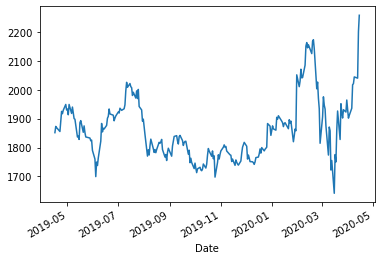

In [31]:
# Сравним 2 графика
df['Open'].plot()

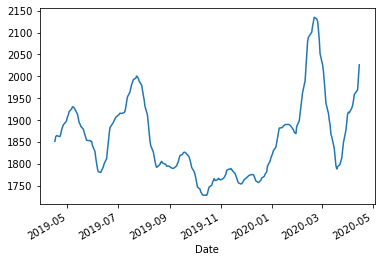

In [38]:
# Сгладим график
df['Open'].rolling(10,min_periods=1).mean().plot()

#### Как видим график стал более гладким и более удобочитаемым

Метод .expanding бывает полезно использовать для получения кумулятивных данных за период. Например, если хотим посчитать суммарный объём торгов за период, можем воспользоваться этим методом:

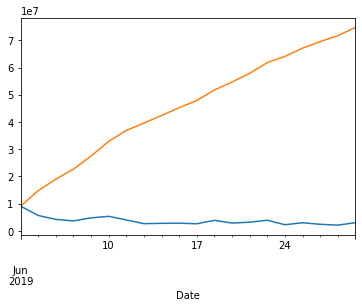

In [41]:
# объём торгов по дням
df['2019-06'].Volume.plot();

# сумма объёмов за этот и предыдущие дни
df['2019-06'].Volume.expanding().sum().plot();

После применения resample можно применить agg, тем самым задав каждой колонке свой вариант агрегации: 

In [43]:
# Сгруппировали по неделям и посчитали для каждой колонки разные значения.
df.resample('1w').agg({'Open': 'mean', 'High': 'max', 'Low': 'min', 'Close': 'mean', 'Volume': 'sum'})

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-21,1864.376668,1876.469971,1848.000000,1863.183309,8688000
2019-04-28,1903.519995,1951.000000,1845.640015,1913.142017,26221700
2019-05-05,1934.903980,1964.400024,1881.869995,1927.950000,20988800
2019-05-12,1914.967993,1959.000000,1856.000000,1915.834009,26424800
2019-05-19,1856.600000,1917.510010,1815.750000,1862.104004,24549500
2019-05-26,1850.347998,1879.000000,1804.199951,1842.986011,18533900
2019-06-02,1817.842499,1849.270020,1772.699951,1811.752472,15244700
2019-06-09,1742.051978,1806.250000,1672.000000,1743.828003,27515100
2019-06-16,1857.989990,1893.699951,1818.000000,1863.923999,17735200


#### Задание
К вам попали наблюдения о числе перелетающих на зимовку стрижей, представленные в виде пандасовской серии wintering. В каждой ячейке указано число пролетевших птиц за этот день. Посчитайте с помощью expanding окна количество всех перелетевших птиц за всё время до данного и поместите в переменную total_birds.

In [ ]:
total_birds = wintering.explanding().sum()

В timeseries есть куча крутых штук для дат.

In [56]:
# какой день 
df.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', name='Date', length=252)

In [57]:
df.index.day_name().value_counts()

Tuesday      53
Wednesday    51
Thursday     50
Friday       50
Monday       48
Name: Date, dtype: int64

In [58]:
df.index.month_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of DatetimeIndex(['2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24', '2019-04-25', '2019-04-26',
               '2019-04-29', '2019-04-30',
               ...
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-13',
               '2020-04-14', '2020-04-15'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)>

In [59]:
df.index.month_name()

Index(['April', 'April', 'April', 'April', 'April', 'April', 'April', 'April',
       'April', 'April',
       ...
       'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April',
       'April', 'April'],
      dtype='object', name='Date', length=252)